# Série histórica de suicídios no Brasil entre 2010 e 2019

"Diversos dados sobre suicídios foram reunidos em uma série histórica baseando-se nos dados provenientes do DATASUS. Mais especificamente, a base de dados do Sistema de Informação sobre Mortalidade (SIM) foi utilizada para extração de dados a partir do pacote PySUS.

Para selecionar apenas os casos de suicídio, a variável CAUSABAS ou CAUSABAS_O (ambas retratando causa básica da morte) deveriam possuir valores da Classificação Internacional de Doenças (CID) entre X600 e X850. Essa faixa de casos do CID englobaria lesões autoprovocadas."

FONTE: <a href="https://www.kaggle.com/psicodata/dados-de-suicidios-entre-2010-e-2019">PsicoData</a>


### Variáveis
* <b>DTOBITO:</b> data do óbito.
* <b>DTNASC:</b> data de nascimento.
* <b>SEXO:</b> sexo. 1 : Masculino, 2 : Feminino.
* <b>RACACOR:</b> raça. 1 : Branca, 2 : Preta, 3 : Amarela, 4 : Parda, 5 : Indígena.
* <b>ESTCIV:</b> estado civil. 1 : Solteiro, 2 : Casado, 3 : Viúvo, 4 : Separado judicialmente, 5 : União consensual.
* <b>ESC:</b> escolaridade. 1 : Nenhuma, 2: 1 a 3 anos, 3 : 4 a 7 anos, 4 : 8 a 11 anos, 5 : 12 e mais, 8 : De 9 a 11 anos.
* <b>OCUP:</b> ocupação. Para óbitos a partir de 2006, segue-se a tabela CBO2002.
* <b>CODMUNRES:</b> município de residência do falecido (codificado).
* <b>LOCOCOR:</b> Local de ocorrência do óbito. 1 : Hospital, 2 : Outro estabelecimento de saúde, 3 : Domicílio, 4 : Via pública, 5 :</b> Outros, 9 : NA.
* <b>ASSISTMED:</b> Assistência médica. 1 : Sim, 2 : Não, 9 : NA.
* <b>CAUSABAS:</b> Causa básica do óbito. Código CID-10.
* <b>CAUSABAS_O:</b> Causa básica do óbito. Código CID-10.

<div align='center'>
<img src="imagens/cabeçalho.png">
</div>

In [1]:
import pandas as pd


import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.dates

import json

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import numpy as np

In [2]:
df = pd.read_csv("suicidios_2010_a_2019.csv")
df_pip = pd.read_csv("pipbrasil.csv")

/home/felipe/miniconda3/envs/estudos/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_pip

,Trimestre/ano,PIP
0,1º trimestre 2010,2.6
1,2º trimestre 2010,5.3
2,3º trimestre 2010,7.5
3,4º trimestre 2010,7.5
4,1º trimestre 2011,6.6
5,2º trimestre 2011,5.6
6,3º trimestre 2011,4.8
7,4º trimestre 2011,4.0
8,1º trimestre 2012,3.1
9,2º trimestre 2012,2.2


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True) #retirando coluna unnmamed

In [5]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


In [6]:
df.shape

(112491, 17)

In [7]:
df.columns

Index(['estado', 'ano', 'mes', 'DTOBITO', 'DTNASC', 'SEXO', 'RACACOR',
       'ASSISTMED', 'ESCMAE', 'ESTCIV', 'ESC', 'OCUP', 'CODMUNRES', 'CAUSABAS',
       'CAUSABAS_O', 'LOCOCOR', 'CIRURGIA'],
      dtype='object')

In [8]:
df.dtypes

estado        object
ano            int64
mes            int64
DTOBITO       object
DTNASC        object
SEXO          object
RACACOR       object
ASSISTMED     object
ESCMAE        object
ESTCIV        object
ESC           object
OCUP          object
CODMUNRES     object
CAUSABAS      object
CAUSABAS_O    object
LOCOCOR       object
CIRURGIA      object
dtype: object

In [9]:
df.isnull().sum()

estado             0
ano                0
mes                0
DTOBITO            0
DTNASC         10858
SEXO              22
RACACOR         3171
ASSISTMED      41804
ESCMAE        112476
ESTCIV          8700
ESC            28164
OCUP           52217
CODMUNRES          0
CAUSABAS           0
CAUSABAS_O       287
LOCOCOR          460
CIRURGIA      103942
dtype: int64

In [10]:
df.drop(["CIRURGIA",'ESCMAE' ], axis=1, inplace=True)

In [11]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio


# Transformando datas

In [12]:
df['DTOBITO'] = pd.to_datetime( df['DTOBITO'] ,format="%Y/%m/%d")
df['DTNASC']=  pd.to_datetime( df['DTNASC'] ,format="%Y/%m/%d",errors = 'coerce')
df['ano_tri'] =df['DTOBITO'].dt.to_period("Q")
df['ano_mes'] =df['DTOBITO'].dt.strftime('%Y-%m')
df['ano_nasc'] =df['DTNASC'].dt.strftime('%Y')

In [13]:
df.head()

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,ano_tri,ano_mes,ano_nasc
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,2010Q1,2010-01,1999
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,2010Q1,2010-02,1985
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,2010Q1,2010-02,1995
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,2010Q2,2010-04,1983
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,2010Q3,2010-07,1982


In [14]:
df.isnull().sum()

estado            0
ano               0
mes               0
DTOBITO           0
DTNASC        11742
SEXO             22
RACACOR        3171
ASSISTMED     41804
ESTCIV         8700
ESC           28164
OCUP          52217
CODMUNRES         0
CAUSABAS          0
CAUSABAS_O      287
LOCOCOR         460
ano_tri           0
ano_mes           0
ano_nasc      11742
dtype: int64

In [15]:
df.dtypes

estado                object
ano                    int64
mes                    int64
DTOBITO       datetime64[ns]
DTNASC        datetime64[ns]
SEXO                  object
RACACOR               object
ASSISTMED             object
ESTCIV                object
ESC                   object
OCUP                  object
CODMUNRES             object
CAUSABAS              object
CAUSABAS_O            object
LOCOCOR               object
ano_tri        period[Q-DEC]
ano_mes               object
ano_nasc              object
dtype: object

# Analisando os dados 

## Número suicídios no Brasil durante o período de 2010 a 2019

In [16]:
df_data = df.groupby('ano_mes').agg('size').reset_index()

In [17]:
df_data.columns = ['ano_mes', 'size']

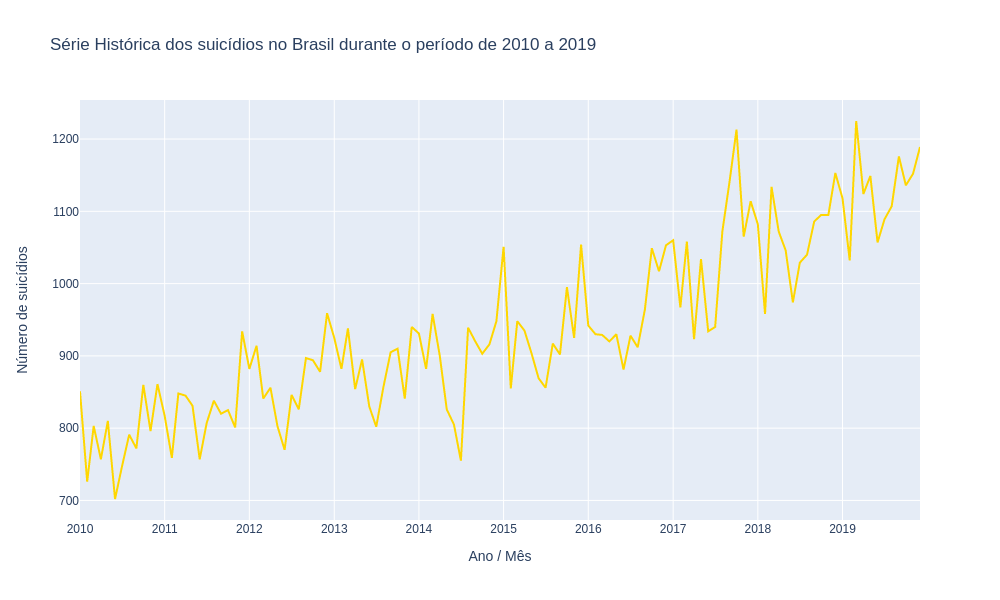

In [18]:
fig = px.line(df_data, 
              x=df_data['ano_mes'], 
              y=df_data['size'], 
              title='Série Histórica dos suicídios no Brasil durante o período de 2010 a 2019',
              labels=dict(y="Número de casos"),
              color_discrete_sequence=['#ffd700'],
              height=600,
             width=1000)
fig.update_layout(yaxis_title='Número de suicídios',
                  xaxis_title='Ano / Mês',
                  height=600,
                     width=1000,)
fig.show("png")

# Comparação do Número de suicídios com o PIP Brasil

In [19]:
df_tri= df.groupby('ano_tri').agg('size').reset_index()

In [20]:
df_tri.columns=['ano/trimestre','size']

In [21]:
df_concat = pd.concat([df_pip,df_tri['size']] ,axis=1)

In [22]:
df_concat

,Trimestre/ano,PIP,size
0,1º trimestre 2010,2.6,2380
1,2º trimestre 2010,5.3,2269
2,3º trimestre 2010,7.5,2310
3,4º trimestre 2010,7.5,2517
4,1º trimestre 2011,6.6,2424
5,2º trimestre 2011,5.6,2433
6,3º trimestre 2011,4.8,2465
7,4º trimestre 2011,4.0,2560
8,1º trimestre 2012,3.1,2637
9,2º trimestre 2012,2.2,2429


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
df_scaler = pd.DataFrame(scaler.fit_transform(df_concat.loc[:,'PIP':'size']), columns=['PIP','size'])

In [26]:
df_concat_scaler = pd.concat([df_concat['Trimestre/ano'],df_scaler], axis=1)

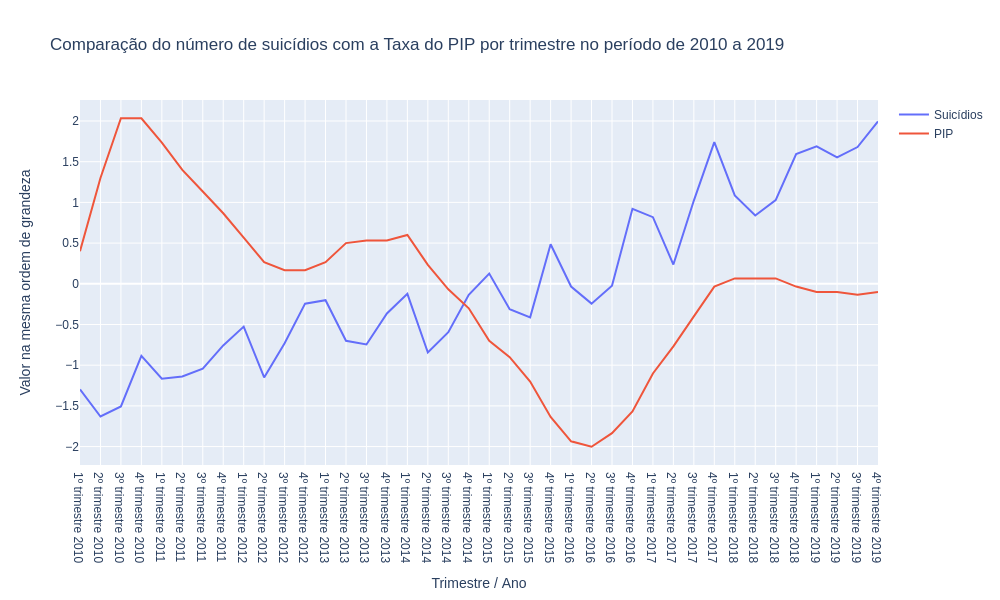

In [27]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=df_concat_scaler['size'], x=df_concat_scaler['Trimestre/ano'],
                    mode='lines',
                    name='Suicídios'))
fig.add_trace(go.Scatter(y=df_concat_scaler['PIP'], x=df_concat_scaler['Trimestre/ano'],
                    mode='lines',
                    name='PIP'))
fig.update_layout(title='Comparação do número de suicídios com a Taxa do PIP por trimestre no período de 2010 a 2019',
                   xaxis_title='Trimestre / Ano',
                  yaxis_title='Valor na mesma ordem de grandeza',
                  height=600,
                     width=1000,)
fig.show('png')

# Número de suicídio por Estado durante o período de 2010 a 2019

In [28]:
df_estado = df.groupby('estado').agg('size').reset_index()

In [29]:
df_estado.columns = ['estado', 'size']

In [30]:
geojson = json.load(open('brasil_estados.json'))

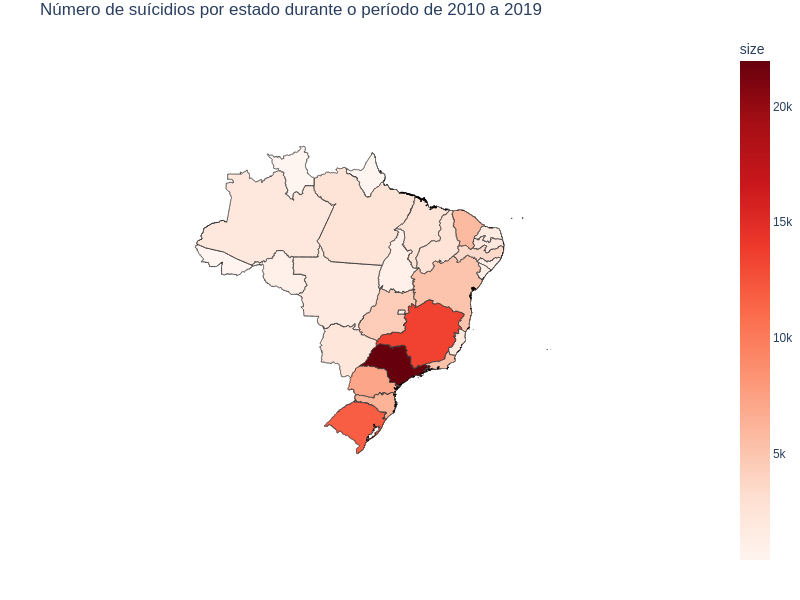

In [31]:
fig = px.choropleth(
     df_estado,
     locations = 'estado', 
     geojson = geojson, 
     color = 'size',
     title = "Número de suícidios por estado durante o período de 2010 a 2019",
     color_continuous_scale="reds",
     center =  {"lat":-22.9034 ,"lon":   -43.1917},
)
fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(margin={"r":0,"t":30,"l":30,"b":30},
                 height=600,
             width=800)
fig.show("png")

# Cidades com maior número de suicídio por estado no período de 2010 a 2019

In [32]:
df_cit = df.groupby(['estado','CODMUNRES']).agg(['size'])

In [33]:
df_cit = df_cit['DTOBITO'].sort_values('size', ascending=False).sort_index(level=[0], sort_remaining=False)

In [34]:
cit_aux=[]
val_aux=[]
for i in df_cit.index.get_level_values('estado').unique():
    cit_aux.append(df_cit.loc[i].index[0]+','+i)
    val_aux.append(df_cit.loc[i]['size'].max())
data = {'cidade/estado': cit_aux , 'quantidade':val_aux}
df_cit = pd.DataFrame(data=data)

In [35]:
df_cit

,cidade/estado,quantidade
0,"Rio Branco,AC",231
1,"Maceió,AL",317
2,"Manaus,AM",1005
3,"Macapá,AP",279
4,"Salvador,BA",683
5,"Fortaleza,CE",1374
6,"Brasília,DF",1490
7,"Serra,ES",198
8,"Goiânia,GO",886
9,"São Luís,MA",374


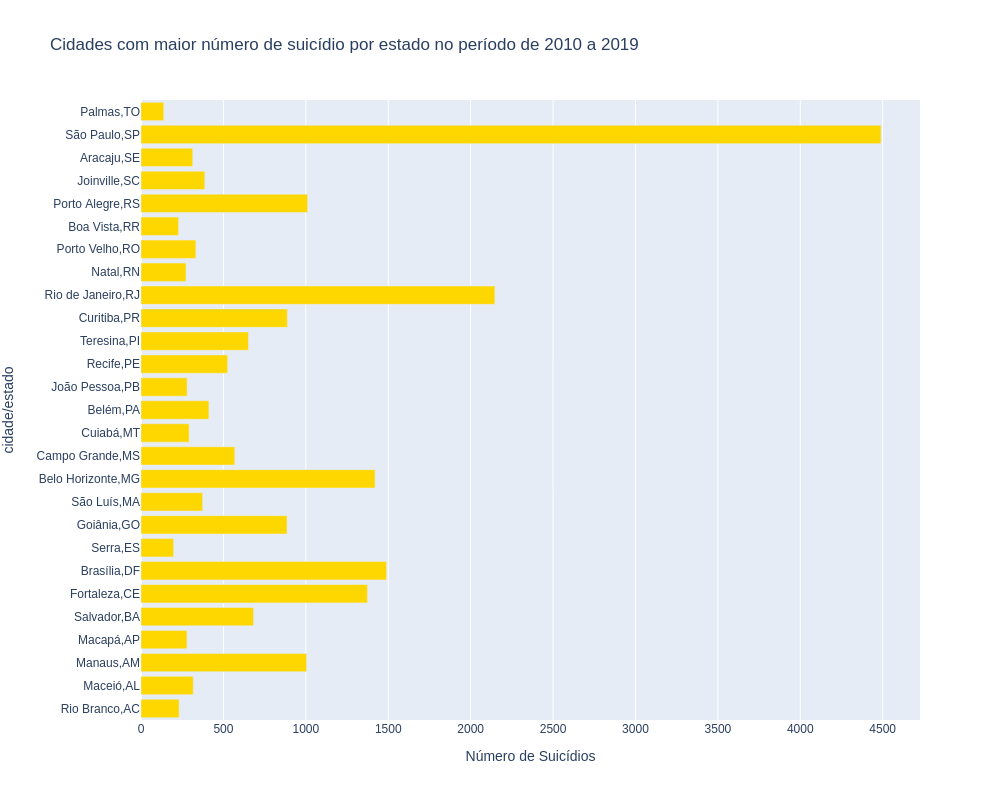

In [36]:
fig = px.bar(df_cit, y="cidade/estado", x="quantidade",
             title='Cidades com maior número de suicídio por estado no período de 2010 a 2019',
             height=800,
             width=1000,
            color_discrete_sequence=['#ffd700'])
fig.update_layout(xaxis_title='Número de Suicídios')
fig.show("png")

## Número de suicídio por sexo

In [37]:
df_sex = df.groupby(['ano','SEXO']).agg('size').reset_index()

In [38]:
df_sex.columns = ['ano','SEXO', 'size']

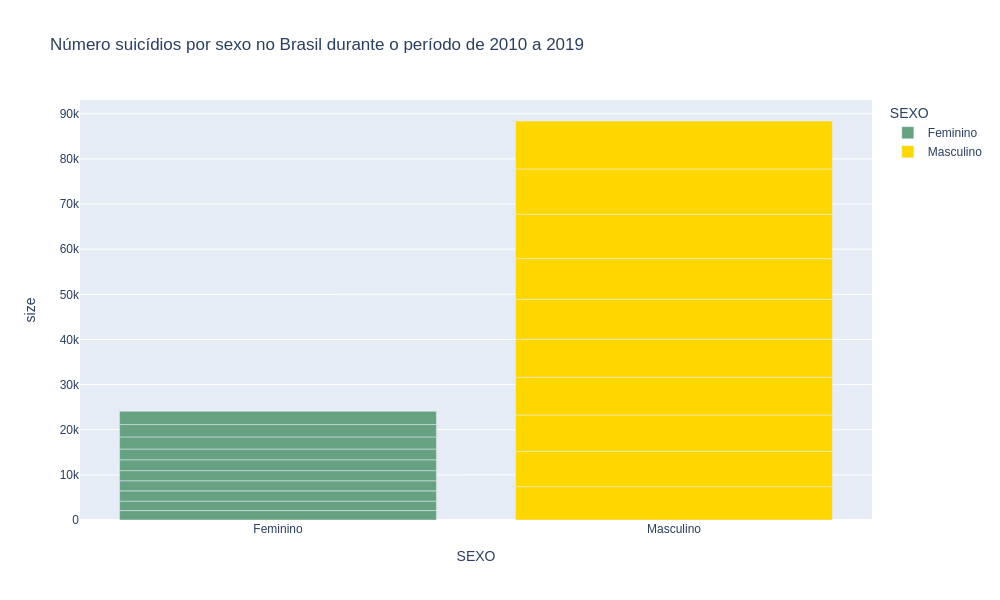

In [39]:
fig = px.bar(df_sex, x="SEXO", y="size", 
             color="SEXO" ,
             title='Número suicídios por sexo no Brasil durante o período de 2010 a 2019',
            color_discrete_map={'Feminino': '#66a182','Masculino': '#ffd700'},
            height=600,
             width=1000)
fig.show('png')

# Número de suícidio por RAÇA / COR no período de 2010 a 2019

In [40]:
df['RACACOR'].unique()

array(['Parda', 'Preta', nan, 'Branca', 'Amarela', 'Indígena'],
      dtype=object)

In [41]:
df['RACACOR'].fillna('Não Informado', inplace=True)
df['RACACOR'].replace('Amarela','Parda', inplace=True)

In [42]:
df_raca = df.groupby(['ano','RACACOR']).agg('size').reset_index()

In [43]:
df_raca.columns = ['ano','RACACOR', 'size']

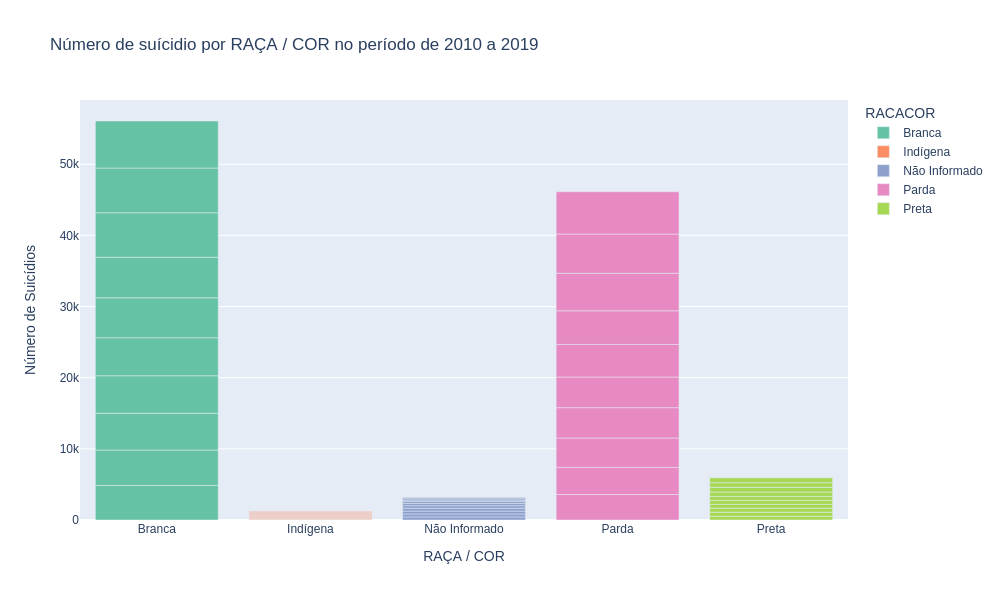

In [78]:
fig = px.bar(df_raca, y="size", x="RACACOR",
             color='RACACOR',
            title='Número de suícidio por RAÇA / COR no período de 2010 a 2019',
             color_discrete_sequence=px.colors.qualitative.Set2,
            height=600,
             width=1000)
fig.update_layout(yaxis_title='Número de Suicídios',
                 xaxis_title='RAÇA / COR')
fig.show("png")

# Número de suícidio por estado civil no período de 2010 a 2019

In [45]:
df['ESTCIV'].unique()

array(['Solteiro/a', 'Casado/a', nan, 'Viúvo/a',
       'Separado/a judicialmente', 'União consensual'], dtype=object)

In [46]:
df['ESTCIV'].isnull().sum()

8700

In [47]:
df['ESTCIV'].fillna('Não Informado', inplace=True)

In [48]:
df_estciv = df.groupby('ESTCIV').agg('size').reset_index()

In [49]:
df_estciv.columns = ['estciv', 'size']

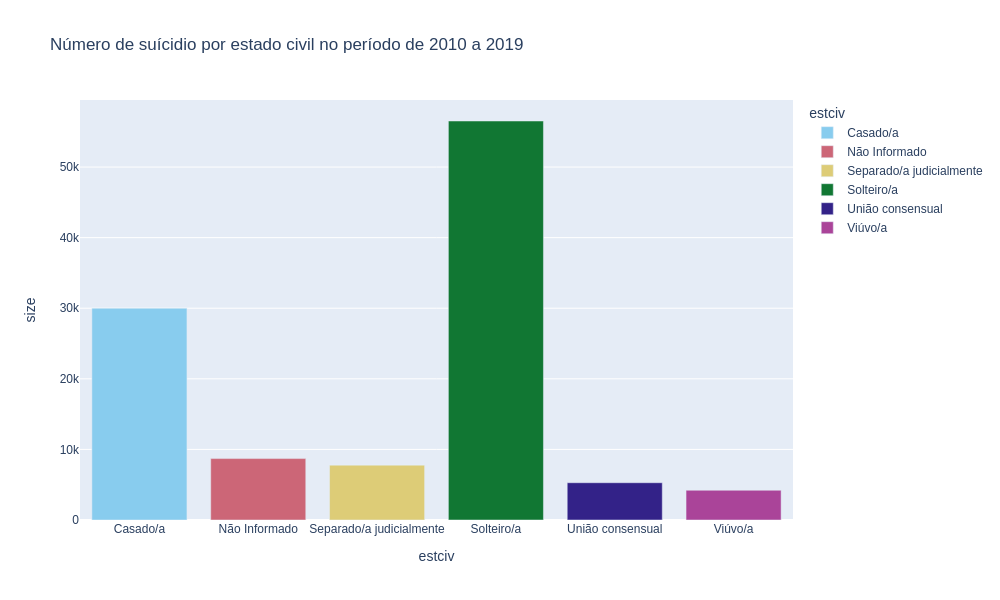

In [50]:
fig = px.bar(df_estciv, y="size", x="estciv",
             color='estciv',
             title='Número de suícidio por estado civil no período de 2010 a 2019',
             color_discrete_sequence=px.colors.qualitative.Safe,
            height=600,
             width=1000)
fig.show("png")

# Idade

In [51]:
df_idade = df.dropna(subset = ['DTNASC'])

In [52]:
df_idade.dtypes

estado                object
ano                    int64
mes                    int64
DTOBITO       datetime64[ns]
DTNASC        datetime64[ns]
SEXO                  object
RACACOR               object
ASSISTMED             object
ESTCIV                object
ESC                   object
OCUP                  object
CODMUNRES             object
CAUSABAS              object
CAUSABAS_O            object
LOCOCOR               object
ano_tri        period[Q-DEC]
ano_mes               object
ano_nasc              object
dtype: object

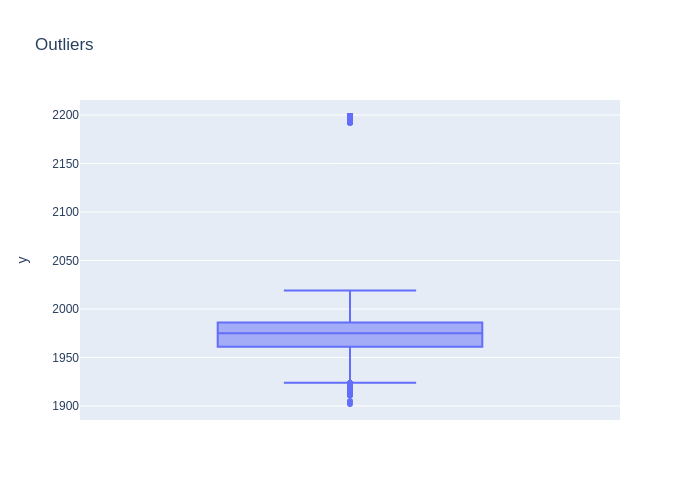

In [53]:
fig = px.box(df, y=df['ano_nasc'].astype(float),title='Outliers')
fig.show("png")

In [54]:
df_idade = df[df['ano_nasc'].astype(float).between(1925, 2019)]

In [55]:
df_idade['idade'] = ((df_idade.DTOBITO - df_idade.DTNASC)/np.timedelta64(1, 'Y')).astype('int')

/tmp/ipykernel_28282/3954291129.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
bins= [0,10,20,30,40,50,60,70,80,90,110]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-110']

In [57]:
df_idade['grupos'] = pd.cut(df_idade['idade'], bins=bins, labels=labels, right=False)

/tmp/ipykernel_28282/3472360782.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df_idade = df_idade.groupby('grupos').agg('size').reset_index()

In [59]:
df_idade.columns = ['grupos','size']

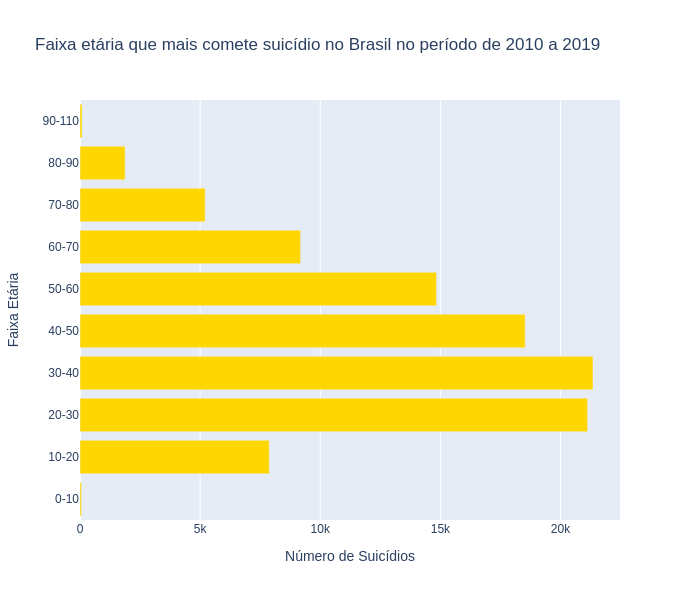

In [60]:
fig = px.bar(df_idade, y="grupos", x="size",
             title='Faixa etária que mais comete suicídio no Brasil no período de 2010 a 2019',
             height=600,
             color_discrete_sequence=['#ffd700'])
fig.update_layout(xaxis_title='Número de Suicídios',
                 yaxis_title='Faixa Etária')
fig.show("png")

# Local da Ocorrência

In [61]:
df['LOCOCOR'].fillna('Não Informado', inplace=True)

In [62]:
df['LOCOCOR'].unique()

array(['Via pública', 'Hospital', 'Domicílio', 'Outros',
       'Outro estabelecimento de saúde', 'Não Informado'], dtype=object)

In [63]:
df['LOCOCOR'].replace('Outro estabelecimento de saúde','Departamentos de Saúde', inplace=True)
df['LOCOCOR'].replace('Hospital','Departamentos de Saúde', inplace=True)

In [64]:
df['LOCOCOR'].unique()

array(['Via pública', 'Departamentos de Saúde', 'Domicílio', 'Outros',
       'Não Informado'], dtype=object)

In [65]:
df_lococor = df.groupby('LOCOCOR').agg('size').reset_index()

In [66]:
df_lococor.columns = ['lococor','size']

In [67]:
df_lococor

,lococor,size
0,Departamentos de Saúde,19312
1,Domicílio,68221
2,Não Informado,460
3,Outros,17502
4,Via pública,6996


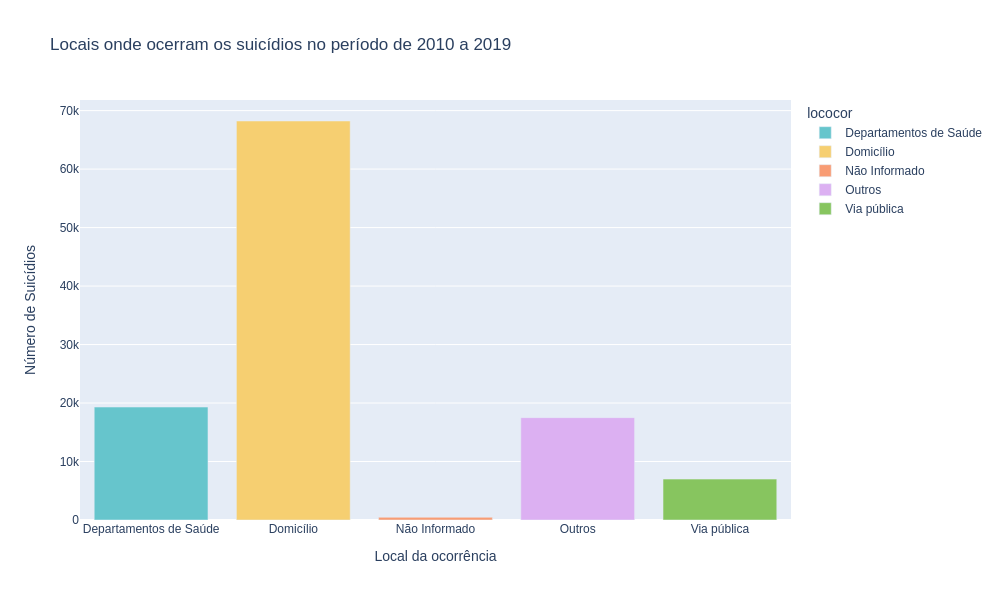

In [68]:
fig = px.bar(df_lococor, y="size", x="lococor",
             color='lococor',
             title='Locais onde ocerram os suicídios no período de 2010 a 2019',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             height=600,
             width=1000)
fig.update_layout(yaxis_title='Número de Suicídios',
                 xaxis_title='Local da ocorrência')
fig.show("png")

# Ocupação / Profissão 

In [69]:
df_ocup = df.groupby('OCUP').agg('size').reset_index()

In [70]:
df_ocup.columns = ['ocupacao', 'size']

In [71]:
df_ocup.sort_values(by='size',ascending= False)[:10]

,ocupacao,size
50,APOSENTADO/PENSIONISTA,7836
303,ESTUDANTE,7756
244,DONA DE CASA,6149
780,TRABALHADOR AGROPECUARIO EM GERAL,5924
262,EMPREGADO DOMESTICO NOS SERVICOS GERAIS,2520
208,DESEMPREGADO CRONICO,2374
362,IGNORADA,2215
618,PRODUTOR AGRICOLA POLIVALENTE,2085
681,REPRESENTANTE COMERCIAL AUTONOMO,2073
133,CASEIRO (AGRICULTURA),1462


In [72]:
df_ocup = df[df['OCUP'].isin(['ESTUDANTE','DONA DE CASA','APOSENTADO/PENSIONISTA'])]

# Setembro Amarelo

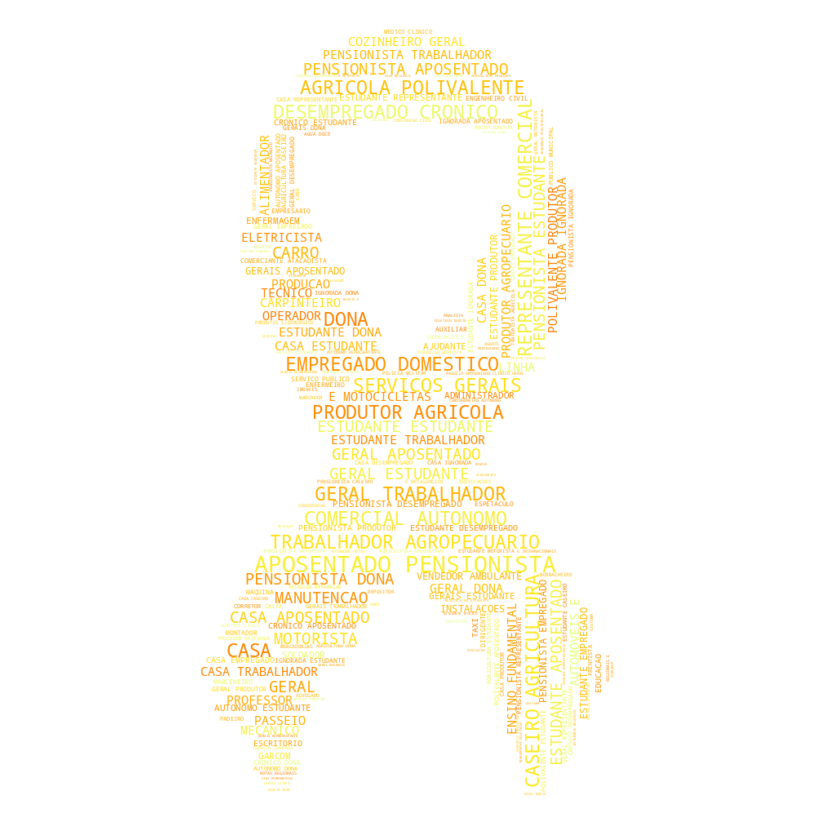

In [73]:
setembro_mask = np.array(Image.open("mask.png")) # máscara

stopwords = set(STOPWORDS) # stop words
stopwords.update(["DA", "DE", "EM", "DE", "NO", "AO", "NOS"])

ocup = df.dropna(subset=['OCUP'], axis=0)['OCUP'] #retirar Nan values
all_ocup = " ".join(s for s in ocup) # juntar palavras
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=200,
                      mask=setembro_mask, max_font_size=200,
                      relative_scaling =0,
                      colormap="Wistia"
                     ).generate(all_ocup)


fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()